# MODULE 3 - Basis of Statistical Reasoning

## 3.1.1 Probability Example

> P(P) = (# of transactions where P was bought)/ n

In [13]:
import pandas as pd

In [14]:
# Suppose 'transactions' is a pandas DF, where each row is a transaction
# and there is a col named 'products' where it lists all the products in that
# transaction
transactions = pd.read_csv('example_files/transactions.csv')
print(transactions)

# Count total # of transactions
total_transactions = len(transactions)
print('Total transactions = ',total_transactions)

# Just out of curiosity to learn how to pick out elements of a DF
for i,j in transactions.iterrows():
    if 'P' in j['products']:
        print(i, j)


# Count # of transactions where P was bought
product_p_transactions = transactions['products'].apply(lambda x: 'P' in x).sum()
print('Product P transactions = ', product_p_transactions)

# Calculate probability
p_p = product_p_transactions / total_transactions
print('P(P) = ', p_p)

  products
0    A,B,P
1      C,D
2        P
3    A,P,D
4        E
5      B,C
6      P,E
7        A
8      D,P
Total transactions =  9
0 products    A,B,P
Name: 0, dtype: object
2 products    P
Name: 2, dtype: object
3 products    A,P,D
Name: 3, dtype: object
6 products    P,E
Name: 6, dtype: object
8 products    D,P
Name: 8, dtype: object
Product P transactions =  5
P(P) =  0.5555555555555556


## 3.1.2.1 Sample Space

In [15]:
import numpy as np

In [16]:
ecommerce_data = pd.read_csv('example_files/ecommerce.csv')
print(ecommerce_data)

product_sample_space = ecommerce_data['product'].unique()
print(product_sample_space, '\n')

num_possible_outcomes = len(product_sample_space)
print('Number of possible outcomes = ', num_possible_outcomes, '\n')

amount_spent_sample_space = np.linspace(ecommerce_data['amount_spent'].min(), ecommerce_data['amount_spent'].max(), 1000)
# print('Amount spent space = ', amount_spent_sample_space)

length_of_sample_space = amount_spent_sample_space[-1] - amount_spent_sample_space[0]
print('Length of sample space = ', length_of_sample_space, '\n')

event_product_A = ecommerce_data[ecommerce_data['product'] == 'A']
print('Event product A\n', event_product_A, '\n')

event_spent_over_100 = ecommerce_data[ecommerce_data['amount_spent'] > 100]
print('Event spent over 100\n', event_spent_over_100)




  product  amount_spent
0       A           120
1       B            80
2       C           200
3       A            90
4       D           150
5       B            60
6       E           300
7       A           100
8       C            50
9       D           130
['A' 'B' 'C' 'D' 'E'] 

Number of possible outcomes =  5 

Length of sample space =  250.0 

Event product A
   product  amount_spent
0       A           120
3       A            90
7       A           100 

Event spent over 100
   product  amount_spent
0       A           120
2       C           200
4       D           150
6       E           300
9       D           130


## 3.2.1.3 Independent Events

P(A ^ B) = P(A) * P(B) if A and B are independent events

In [17]:
transaction_data = pd.read_csv('example_files/ecommerce.csv')
print(transaction_data,'\n')

transaction_data = transaction_data.drop(columns='amount_spent')
print('Dropped amount_spent col\n', transaction_data,'\n')

transaction_data['id'] = transaction_data.index
print('Added id col\n', transaction_data,'\n')

event_A = transaction_data[transaction_data['product'] == 'A']
print('Event A\n', event_A, '\n')

event_B = transaction_data[transaction_data['product'] == 'B']
print('Event B\n', event_B, '\n')

p_A = len(event_A)/len(transaction_data)
print('P(A) = ', p_A)

p_B = len(event_B)/len(transaction_data)
print('P(B) = ', p_B)

# Calculate P(A and B) using inner join on id
p_A_and_B = len(pd.merge(event_A, event_B, on='id'))/len(transaction_data)
print('P(A and B) = ', p_A_and_B)

if p_A_and_B == p_A * p_B:
    print('P(A) and P(B) are independent')
else:
    print('P(A) and P(B) are not independent')


  product  amount_spent
0       A           120
1       B            80
2       C           200
3       A            90
4       D           150
5       B            60
6       E           300
7       A           100
8       C            50
9       D           130 

Dropped amount_spent col
   product
0       A
1       B
2       C
3       A
4       D
5       B
6       E
7       A
8       C
9       D 

Added id col
   product  id
0       A   0
1       B   1
2       C   2
3       A   3
4       D   4
5       B   5
6       E   6
7       A   7
8       C   8
9       D   9 

Event A
   product  id
0       A   0
3       A   3
7       A   7 

Event B
   product  id
1       B   1
5       B   5 

P(A) =  0.3
P(B) =  0.2
P(A and B) =  0.0
P(A) and P(B) are not independent


## 3.3.2 Construction of a Probability Space


In [18]:
transaction_data = pd.read_csv('example_files/transactions_probability_space.csv')
print(transaction_data,'\n')

sample_space = transaction_data['itemset'].unique()
print(sample_space, '\n')

event_A = transaction_data[transaction_data['total'] > 100]
print('Event A\n', event_A, '\n')

event_B = transaction_data[transaction_data['itemset'].str.contains('Fruit-Vegetable')]
print('Event B\n', event_B, '\n')

p_A = len(event_A)/len(transaction_data)
print('P(A) = ', p_A)

p_B = len(event_B)/len(transaction_data)
print('P(B) = ', p_B)

           itemset  total
0       Milk-Bread     45
1            Fruit    120
2        Vegetable    110
3            Fruit     80
4        Meat-Eggs    130
5       Bread-Milk     95
6  Fruit-Vegetable    150
7        Milk-Eggs     40
8           Cereal     50
9  Fruit-Vegetable     90 

['Milk-Bread' 'Fruit' 'Vegetable' 'Meat-Eggs' 'Bread-Milk'
 'Fruit-Vegetable' 'Milk-Eggs' 'Cereal'] 

Event A
            itemset  total
1            Fruit    120
2        Vegetable    110
4        Meat-Eggs    130
6  Fruit-Vegetable    150 

Event B
            itemset  total
6  Fruit-Vegetable    150
9  Fruit-Vegetable     90 

P(A) =  0.4
P(B) =  0.2


## 3.4.1 Kolmogorov Axiom


In [19]:
# Define sample space for a 6-side fair die
sample_space = np.array([1,2,3,4,5,6])
print(sample_space, '\n')

# Compute the probability of each result
probabilities = np.full(6, 1/6)
print(probabilities, '\n')

# Axiom 1 - Non-negativity
assert np.all(probabilities >= 0)

# Axiom 2 - Normality
assert np.isclose(np.sum(probabilities), 1)

# Event A - Obtaining an even number
event_A = sample_space[sample_space % 2 == 0]
print('Event A\n', event_A, '\n')

# Event B - Obtaining an odd number
event_B = sample_space[sample_space % 2 != 0]
print('Event B\n', event_B, '\n')

# Axiom 3 - Countable additivity
assert np.isclose(
    np.sum(probabilities[event_A - 1]) + np.sum(probabilities[event_B - 1]), 1)





[1 2 3 4 5 6] 

[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667] 

Event A
 [2 4 6] 

Event B
 [1 3 5] 



## 3.4.2 Properties and Theorems

### Complement Property
$ P(A^c) = 1 - P(A) $

### Total Probability Theorem
$ P(B) = \sum_{i=1}^n [P(B|A_i) * P(A_i)] $
<br>
$ P(A) = P(A|B)*P(B) + P(A|\sim B)*P(\sim B) $

### Conditional Probability Theorem
$P(A|B) = \frac{P(A \cap B)}{P(B)}$ if P(B) > 0

In [20]:
# Generate random sales data
sales_data = np.random.choice([0,1], size=10000, p=[0.7, 0.3])
# print(sales_data, '\n')

# This turns the array into a boolean array where 0s are False and 1s are True
event_A = (sales_data == 1)
print('Event A\n', event_A, '\n')

event_B = np.random.choice([0,1], size=10000, p=[0.5,0.5])
event_B = event_B.astype(bool)


# Compute probabilities of events A and B, we use .mean in this case
# because the mean is the probability since we are adding 0s and 1s
P_A = np.mean(event_A)
print('P(A) = ', P_A)
print('P(~A) = ', np.mean(~event_A))

P_B = np.mean(event_B)
print('P(B) = ', P_B)
print('P(~B) = ', np.mean(~event_B))

P_A_given_B = np.mean(event_A[event_B])
print('P(A|B) = ', P_A_given_B)

P_A_given_notB = np.mean(event_A[~event_B])
print('P(A|~B) = ', P_A_given_notB)

# Compute the probability of intersection
# It checks if event_A[i] == event_B[i]
P_A_and_B = np.mean(event_A & event_B)
print('P(A and B) = ', P_A_and_B)

# Assert complementarity property
assert np.isclose(1 - P_A, np.mean(~event_A))
assert np.isclose(1 - P_B, np.mean(~event_B))
print('Complementarity property respected')

# Assert Total Probability Theorem
assert np.isclose( P_A, P_A_given_B*P_B + P_A_given_notB*(1-P_B) )
print('Law of Total Probability Successfully asserted!')

# Assert Conditional Probability Theorem
assert np.isclose(P_A_and_B/P_B , np.mean(event_A[event_B]))
print('Conditional Probability Theorem y Successfully asserted!')


Event A
 [False False False ...  True False False] 

P(A) =  0.2985
P(~A) =  0.7015
P(B) =  0.4903
P(~B) =  0.5097
P(A|B) =  0.29818478482561694
P(A|~B) =  0.298803217578968
P(A and B) =  0.1462
Complementarity property respected
Law of Total Probability Successfully asserted!
Conditional Probability Theorem y Successfully asserted!


In [21]:
%who

P_A	 P_A_and_B	 P_A_given_B	 P_A_given_notB	 P_B	 amount_spent_sample_space	 ecommerce_data	 event_A	 event_B	 
event_product_A	 event_spent_over_100	 i	 j	 length_of_sample_space	 np	 num_possible_outcomes	 p_A	 p_A_and_B	 
p_B	 p_p	 pd	 probabilities	 product_p_transactions	 product_sample_space	 pydev_jupyter_vars	 remove_imported_pydev_package	 sales_data	 
sample_space	 sys	 total_transactions	 transaction_data	 transactions	 var	 


In [22]:
for var in [
    "P_A", "P_A_and_B", "P_A_given_B", "P_A_given_notB", "P_B", "amount_spent_sample_space",
    "ecommerce_data", "event_A", "event_B", "event_b", "event_product_A",
    "event_spent_over_100", "i", "j", "length_of_sample_space", "np",
    "num_possible_outcomes", "p_A", "p_A_and_B", "p_B", "p_p", "pd",
    "probabilities", "product_p_transactions", "product_sample_space",
    "products_list", "pydev_jupyter_vars", "remove_imported_pydev_package",
    "sales_data", "sample_space", "sys", "total_transactions", "transaction",
    "transaction_data", "transactions"
]:
    globals().pop(var, None)


In [23]:
%who

pydev_jupyter_vars	 remove_imported_pydev_package	 sys	 var	 


## 3.5.1 Product Rule and Bayes Theorem

### Product Rule
Determines the joint probability of 2 events<br>
$ P(A , B) = P(A \cap B) = P(A)*P(B|A) = P(B)*P(A|B) $

### Bayes Theorem
$ P(A|B) = P(B|A)*\frac{P(A)}{P(B)} $

In [26]:
import numpy as np

# Generate random data for events A and B
event_A = np.random.choice([0,1], size=10000, p=[0.9, 0.1])
event_B = np.random.choice([0,1], size=10000, p=[0.95, 0.05])

# Compute probabilities for each
P_A = np.mean(event_A)
print('P(A) = ', P_A)

P_B = np.mean(event_B)
print('P(B) = ', P_B)

# Compute P(A and B), P(A|B) and P(B|A) using product rule
P_A_and_B = np.mean(event_A & event_B)
assert np.isclose(P_A_and_B, np.mean(event_A*event_B))
print('P(A and B) = ', P_A_and_B)

P_A_given_B = P_A_and_B/P_B
assert np.isclose(P_A_given_B, np.mean(event_A[event_B.astype(bool)]))
print('P(A|B) = ', P_A_given_B, np.mean(event_A[event_B.astype(bool)]))

P_B_given_A = P_A_and_B/P_A
assert np.isclose(P_B_given_A, np.mean(event_B[event_A.astype(bool)]))
print('P(B|A) = ', P_B_given_A, np.mean(event_B[event_A.astype(bool)]))

# Verify Product Rule
assert np.isclose(P_A_and_B, P_A * P_B_given_A)
assert np.isclose(P_A_and_B, P_B * P_A_given_B)
print('Product Rule successfully asserted!')

# Verify Bayes Theorem
assert np.isclose(P_A_given_B, P_B_given_A * P_A / P_B)
print('Bayes Theorem successfully asserted!')



P(A) =  0.1002
P(B) =  0.0518
P(A and B) =  0.0057
P(A|B) =  0.11003861003861004 0.11003861003861004
P(B|A) =  0.056886227544910184 0.05688622754491018
Product Rule successfully asserted!
Bayes Theorem successfully asserted!


## 3.6.1.1 Cumulative Distribution Function
$F(x) = P(X ≤ x)$

In [27]:
import matplotlib.pyplot as plt
import random

[3, 14, 12, 14, 18, 15, 21, 13, 23, 2, 13, 22, 1, 15, 25, 24, 6, 8, 17, 22, 9, 3, 21, 5, 2, 13, 5, 2, 17, 13, 23, 5, 23, 4, 20, 16, 17, 15, 14, 6, 12, 21, 15, 6, 22, 21, 14, 2, 9, 21, 6, 20, 12, 7, 7, 1, 2, 20, 2, 8, 8, 4, 21, 5, 22, 9, 11, 17, 8, 25, 16, 14, 9, 21, 4, 25, 22, 21, 5, 25, 19, 5, 2, 19, 21, 25, 22, 23, 9, 5, 10, 12, 15, 24, 20, 18, 21, 20, 16, 15]
[1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 9, 10, 11, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 16, 16, 16, 17, 17, 17, 17, 18, 18, 19, 19, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 24, 24, 25, 25, 25, 25, 25]
[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14
 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28
 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42
 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0

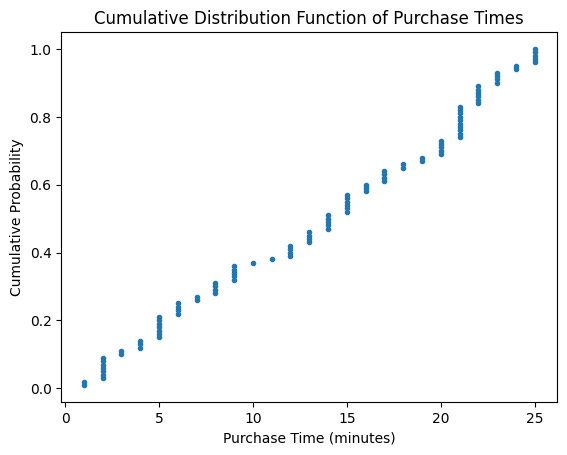

In [28]:
purchase_times = [random.randint(1,25) for _ in range(100)]
print(purchase_times)

purchase_times.sort()
print(purchase_times)

# Create list of cumulative properties from 1/N to 1
probabilities = np.arange(1, len(purchase_times)+1) /len(purchase_times)
print(probabilities)

# Create graph
plt.plot(purchase_times, probabilities, marker='.' ,linestyle='none')

# Set up tags and title
plt.title('Cumulative Distribution Function of Purchase Times')
plt.xlabel('Purchase Time (minutes)')
plt.ylabel('Cumulative Probability')

plt.show()

## 3.6.1.2 Density Function


In [29]:
from scipy.stats import norm

Mean = 179.56 
Deviation =  17.336274109508075

 [150.         150.60606061 151.21212121 151.81818182 152.42424242
 153.03030303 153.63636364 154.24242424 154.84848485 155.45454545
 156.06060606 156.66666667 157.27272727 157.87878788 158.48484848
 159.09090909 159.6969697  160.3030303  160.90909091 161.51515152
 162.12121212 162.72727273 163.33333333 163.93939394 164.54545455
 165.15151515 165.75757576 166.36363636 166.96969697 167.57575758
 168.18181818 168.78787879 169.39393939 170.         170.60606061
 171.21212121 171.81818182 172.42424242 173.03030303 173.63636364
 174.24242424 174.84848485 175.45454545 176.06060606 176.66666667
 177.27272727 177.87878788 178.48484848 179.09090909 179.6969697
 180.3030303  180.90909091 181.51515152 182.12121212 182.72727273
 183.33333333 183.93939394 184.54545455 185.15151515 185.75757576
 186.36363636 186.96969697 187.57575758 188.18181818 188.78787879
 189.39393939 190.         190.60606061 191.21212121 191.81818182
 192.42424242 193.03030303 1

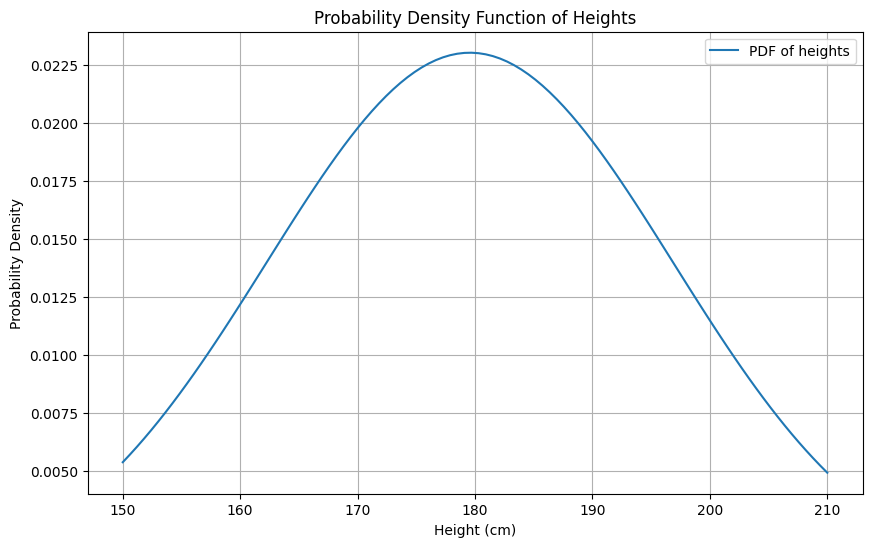

In [30]:
# Heights in cm
heights = [random.randint(150,210) for _ in range(1000)]

mean, deviation = np.mean(heights), np.std(heights)
print('Mean =',mean, '\nDeviation = ', deviation)

# Create a range to evaluate the range of height values for the PDF
values = np.linspace(min(heights), max(heights), 100)
print('\n', values)

# Evaluate PDF in the given values
densities = norm.pdf(values, mean, deviation)
print('\n', densities)

# Create PDF graph
plt.figure(figsize=(10,6))
plt.plot(values, densities, label='PDF of heights')

# Add graph details
plt.title('Probability Density Function of Heights')
plt.xlabel('Height (cm)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)

plt.show()

## 3.6.1.3 Probability Mass Function

In [31]:
from scipy.stats import binom


 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 


 [7.97922663e-04 6.83933711e-03 2.78458725e-02 7.16036722e-02
 1.30420974e-01 1.78863051e-01 1.91638983e-01 1.64261985e-01
 1.14396740e-01 6.53695655e-02 3.08170809e-02 1.20066549e-02
 3.85928193e-03 1.01783260e-03 2.18106985e-04 3.73897689e-05
 5.00755833e-06 5.04963865e-07 3.60688475e-08 1.62716605e-09
 3.48678440e-11] 



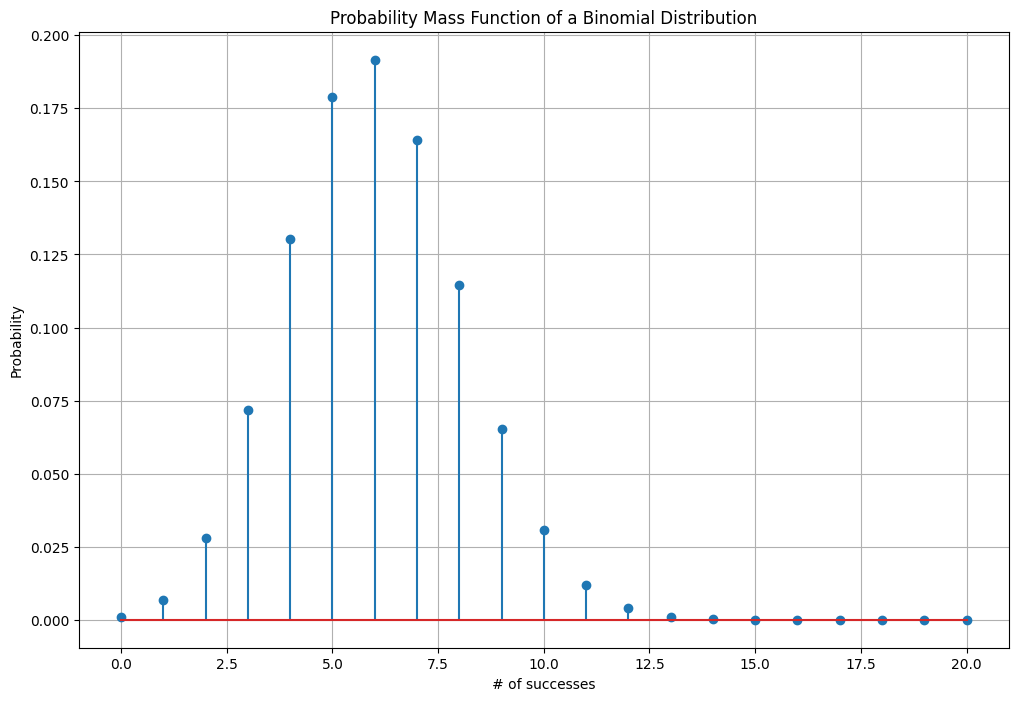


 [7.97922663e-04 7.63725977e-03 3.54831323e-02 1.07086805e-01
 2.37507779e-01 4.16370829e-01 6.08009812e-01 7.72271797e-01
 8.86668537e-01 9.52038103e-01 9.82855184e-01 9.94861838e-01
 9.98721120e-01 9.99738953e-01 9.99957060e-01 9.99994450e-01
 9.99999457e-01 9.99999962e-01 9.99999998e-01 1.00000000e+00
 1.00000000e+00] 



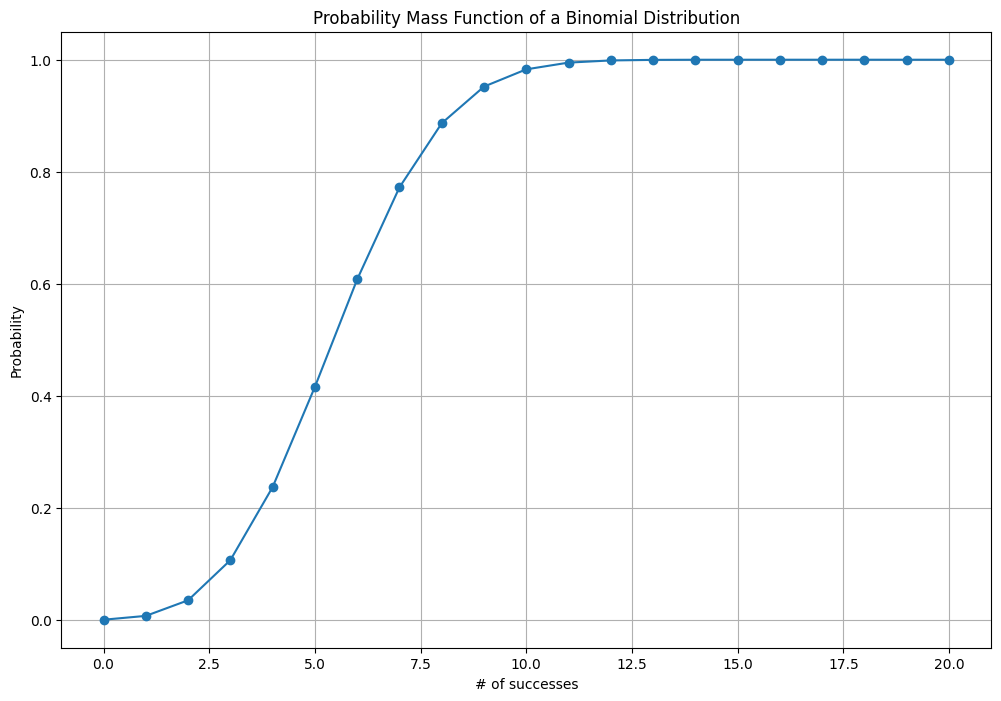

In [34]:
# Binomial distribution parameters
n, p = 20, 0.3

# Create a list with all possible results
x = np.arange(0,n+1)
print('\n', x, '\n')

# Compute PMF for each result
pmf = binom.pmf(x, n, p)
print('\n', pmf, '\n')

# Create PMF graph
plt.figure(figsize=(12,8))
plt.stem(x, pmf) # Stem plot, vertical lines from y=0
plt.title('Probability Mass Function of a Binomial Distribution')
plt.xlabel('# of successes')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

# We can also compute the CDF
cumulative_prob = binom.cdf(x, n, p)
print('\n', cumulative_prob, '\n')

# Create CDF graph
plt.figure(figsize=(12,8))
plt.plot(x, cumulative_prob, marker='o')
plt.title('Probability Mass Function of a Binomial Distribution')
plt.xlabel('# of successes')
plt.ylabel('Probability')
plt.grid(True)
plt.show()


## 3.7.1 Mean
$ E(x) = \sum_{1}^{n} p_i * x_i = p_1 * x_1 + p_2 * x_2 + ... + p_n * x_n $

In [37]:
# We are going to throw a fair die
X = np.array([1,2,3,4,5,6])
print('\n', X, '\n')
P_X = np.full(6, 1/6)
print('\n', P_X, '\n')

E_X = np.sum(X*P_X)
print('\n', E_X, '\n')


 [1 2 3 4 5 6] 


 [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667] 


 3.5 



In [41]:
import pandas as pd
# doing this two diff ways

# using np
sales = np.array([0,100,200,300,400,500])
print('Sales = ', sales, '\n')

prob_sales = np.array([0.1,0.2,0.3,0.15,0.15,0.1])
print('Probability Sales = ', prob_sales, '\n')

E_sales = np.sum(sales*prob_sales)
print('E_Sales = ', E_sales, '\n')

# or using a dataframe
df = pd.DataFrame({
    'sales': [0,100,200,300,400,500],
    'prob_sales': [0.1,0.2,0.3,0.15,0.15,0.1]
})
print('\n', df, '\n')

df['sales*prob_sales'] = df['sales']*df['prob_sales']
print('\n', df, '\n')

E_sales = df['sales*prob_sales'].sum()
print('E_Sales = ', E_sales, '\n')

Sales =  [  0 100 200 300 400 500] 

Probability Sales =  [0.1  0.2  0.3  0.15 0.15 0.1 ] 

E_Sales =  235.0 


    sales  prob_sales
0      0        0.10
1    100        0.20
2    200        0.30
3    300        0.15
4    400        0.15
5    500        0.10 


    sales  prob_sales  sales*prob_sales
0      0        0.10               0.0
1    100        0.20              20.0
2    200        0.30              60.0
3    300        0.15              45.0
4    400        0.15              60.0
5    500        0.10              50.0 

E_Sales =  235.0 



## 3.7.2 Variance and Standard Deviation
Variance:
$ Var(X) = E[(X - E(X))^2] = \sum_{1}^{n} p_i * (x_i - E(X))^2 $
<br>
<br>
Standard Deviation: $ \sigma (X) = \sqrt{Var(X)} $

In [42]:
import numpy as np

# Generate 1000 random data that follow normal dist
data = np.random.normal(0,1,1000)
print('\n', data, '\n')

# Compute Variance and Std
var = np.var(data)
print('Var = ', var, '\n')
std = np.std(data)
print('Std = ', std, '\n')



 [ 1.12283680e+00  2.10174215e+00  1.16805341e-01  8.04002705e-01
  9.79409451e-01 -6.34010871e-01  2.07303644e-01 -1.59194444e+00
 -4.88718913e-01  5.23819403e-01 -2.04901626e+00 -2.17658788e-01
 -2.12244689e-01 -1.30145908e-01 -1.17755044e-01 -1.49497475e+00
  3.82868562e-01  3.60611981e-01  7.94696283e-01 -9.33103111e-01
  6.79941784e-01 -4.23775382e-03 -6.83879191e-01 -1.02801144e+00
  5.44518958e-01 -9.03035370e-01 -6.72649343e-01 -1.42236756e-01
  4.06306024e-01  4.10229431e-01  7.24090925e-01 -9.18588187e-01
  6.46666370e-01  2.23740232e-01  1.61151104e+00  2.26777053e-01
  6.64685399e-01 -1.71266210e+00 -1.31080086e+00 -1.52470542e-02
 -3.61388737e-01  2.61783317e+00  2.86961934e-01  1.08653432e+00
  7.39456203e-01 -2.45186955e-01 -1.25044917e+00 -5.15449846e-01
 -8.64186637e-01  1.42381756e+00  4.63589178e-01  3.22669997e-01
  8.31712230e-01 -1.58541502e+00 -2.14843434e-01  1.30748689e+00
 -1.12669213e+00  1.05854222e+00  6.63724814e-01  2.94836374e-01
 -5.43649389e-02  2.152

## 3.8.1.1 Binomial Distribution
Very simple, we are calculating the probability that we have k successes <br><br>
$ PDF: P(X=k) = C(n,k) * p^k * (1-p)^{n-k} $
<br>
P(X=k): probability of k successes in n trials <br>
p: Probability of success in a single trial <br>
k: # of successes that we are interested in getting <br>
n: # of total trials <br>

$CDF: P(X≤k) = \sum_{0}^{k}C(n,k) * p^i * (1-p)^{n-1}$

In [46]:
# Parameters
n = 10 # # of trials
p = 0.5 # probability of success

# Generate 1000 data that follow this distribution
data = np.random.binomial(n, p, 20)
print('\n', data, '\n')


 [5 5 5 5 4 8 4 5 4 4 4 7 6 2 5 7 5 6 5 5] 



## 3.8.1.2 Poisson Distribution

What is the likelihood that an event occurs k times in a specific interval<br>
$ PDF: P(X=k) = \lambda ^k * e^\frac{-\lambda}{k!} $<br>
P(X=k): probability of k successes in an interval <br>
$\lambda$: avg occurrences per interval<br>
k: # occurrences being considered<br>

$CDF: P(X≤k) = \sum_{0}^{k} \frac{e^{-\lambda}\lambda^i}{i!}$

In [47]:
import numpy as np

lambda_ = 3

data = np.random.poisson(lambda_, 20)
print('\n', data, '\n')


 [4 1 2 4 2 7 6 7 2 1 1 3 2 1 4 3 4 3 2 3] 



## 3.8.1.3 Geometrical Distribution

Describes the # of trials necessary to get the first success in a series of independent Bernoulli trials <br>

$ PDF: P(X=k) = (1 - p)^{k-1} * p $<br>
P(X=k): probability that the 1st success occurs in the kth trial <br>
p: probability of success in each trial <br>
k: # of trials until 1st success <br>

$CDF: P(X≤x) = 1 - (1-p)^x$

In [48]:
import scipy.stats as stats

p = 0.5
k = np.arange(1,10)
print('\n', k, '\n')

geom_dist = stats.geom.pmf(k,p)
print('\n', geom_dist, '\n')


 [1 2 3 4 5 6 7 8 9] 


 [0.5        0.25       0.125      0.0625     0.03125    0.015625
 0.0078125  0.00390625 0.00195312] 



## Normal Distribution
$ PDF: f(x; \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}} $<br>
$x$: is the random variable <br>
$\mu$: is the mean <br>
$\sigma$: is the standard deviation<br>

$F(x) = \frac{1}{2} * [1 + erf(\frac{x - \mu}{\sigma \sqrt{2}})]$


 [ 0.16116514 -0.03097296  0.08662907  0.14111943 -0.07302894 -0.07208562
 -0.05325235 -0.08974906  0.18363205  0.08152392  0.07359716  0.05184216
  0.00599993 -0.02460186 -0.05265627 -0.24181434 -0.07254122 -0.00172674
  0.08874423  0.16111762 -0.10200228 -0.0441745   0.0430177  -0.02108245
 -0.07330608 -0.01354565  0.024673    0.09296846  0.03979415  0.01298908
  0.00132878 -0.09494645  0.02529062  0.00357304  0.15376122 -0.02679643
 -0.00293629 -0.05207353 -0.07395385 -0.00848163  0.07692526 -0.01364673
 -0.04941475  0.1517819  -0.08473751  0.02813782 -0.03797206  0.08320449
 -0.04762193  0.00554223  0.09729743  0.16150229  0.12969029  0.04569027
 -0.06264417  0.05767525  0.08500107 -0.04299297  0.22856978 -0.00697054
 -0.13671418  0.1008596   0.08877305  0.0573673   0.01182019  0.03191018
 -0.05403433 -0.01793106  0.2376333  -0.10905635 -0.21617521  0.07987993
 -0.10089848  0.1001272  -0.00435199  0.04991375 -0.05030787 -0.02160461
  0.03779304  0.044055    0.08323018 -0.07333989 

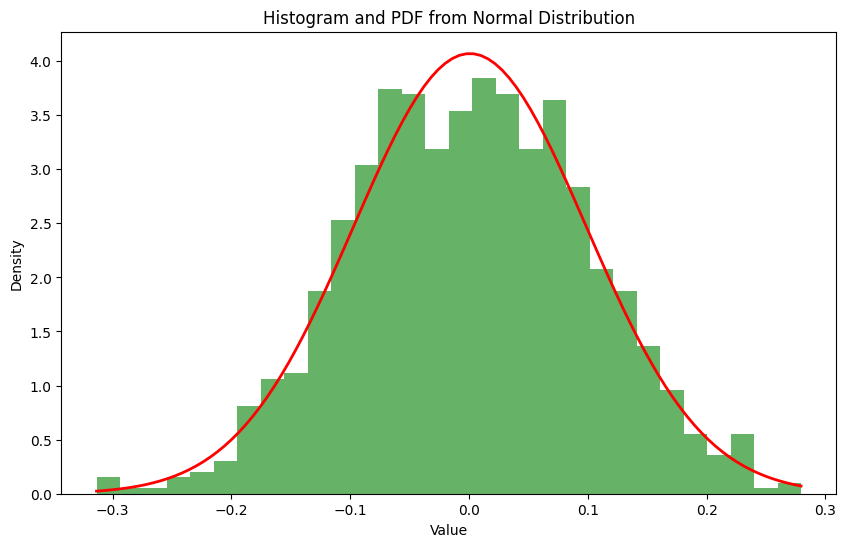

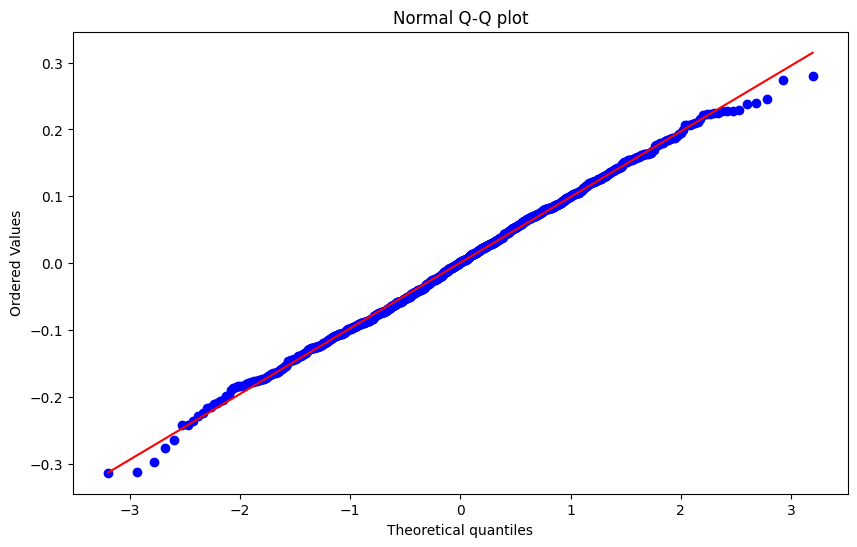

In [49]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

mu, sigma = 0, 0.1
data = np.random.normal(mu, sigma, 1000)
print('\n', data, '\n')

# Sample parameters
sample_mu = np.mean(data)
print('Sample mu:', sample_mu, '\n')

sample_sigma = np.std(data)
print('Sample sigma:', sample_sigma, '\n')

# Value range for theoretical pdf
x = np.linspace(min(data), max(data), 100)
print('\n', x, '\n')
pdf = stats.norm.pdf(x, sample_mu, sample_sigma)
print('\n', pdf, '\n')

# Empirical and Theoretical Graph
plt.figure(figsize=(10,6))
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')
plt.plot(x, pdf, 'r', linewidth=2)
plt.title('Histogram and PDF from Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Density')

# Generate Q-Q Graph
plt.figure(figsize=(10,6))
stats.probplot(data, dist='norm', plot=plt)
plt.title('Normal Q-Q plot')

plt.show()

## 3.8.2.2 Exponential Distribution

Models the time interval between events in a Poisson process <br>
$PDF: f(x; \lambda) = \lambda * e^{-\lambda x}$<br><br>

$CDF: F(x) = 1 - e^{-\lambda x}$


 [6.62090158e-04 1.69831524e-01 3.39000957e-01 5.08170391e-01
 6.77339824e-01 8.46509258e-01 1.01567869e+00 1.18484812e+00
 1.35401756e+00 1.52318699e+00 1.69235643e+00 1.86152586e+00
 2.03069529e+00 2.19986473e+00 2.36903416e+00 2.53820359e+00
 2.70737303e+00 2.87654246e+00 3.04571189e+00 3.21488133e+00
 3.38405076e+00 3.55322019e+00 3.72238963e+00 3.89155906e+00
 4.06072850e+00 4.22989793e+00 4.39906736e+00 4.56823680e+00
 4.73740623e+00 4.90657566e+00 5.07574510e+00 5.24491453e+00
 5.41408396e+00 5.58325340e+00 5.75242283e+00 5.92159226e+00
 6.09076170e+00 6.25993113e+00 6.42910056e+00 6.59827000e+00
 6.76743943e+00 6.93660887e+00 7.10577830e+00 7.27494773e+00
 7.44411717e+00 7.61328660e+00 7.78245603e+00 7.95162547e+00
 8.12079490e+00 8.28996433e+00 8.45913377e+00 8.62830320e+00
 8.79747263e+00 8.96664207e+00 9.13581150e+00 9.30498094e+00
 9.47415037e+00 9.64331980e+00 9.81248924e+00 9.98165867e+00
 1.01508281e+01 1.03199975e+01 1.04891670e+01 1.06583364e+01
 1.08275058e+01 1.0996

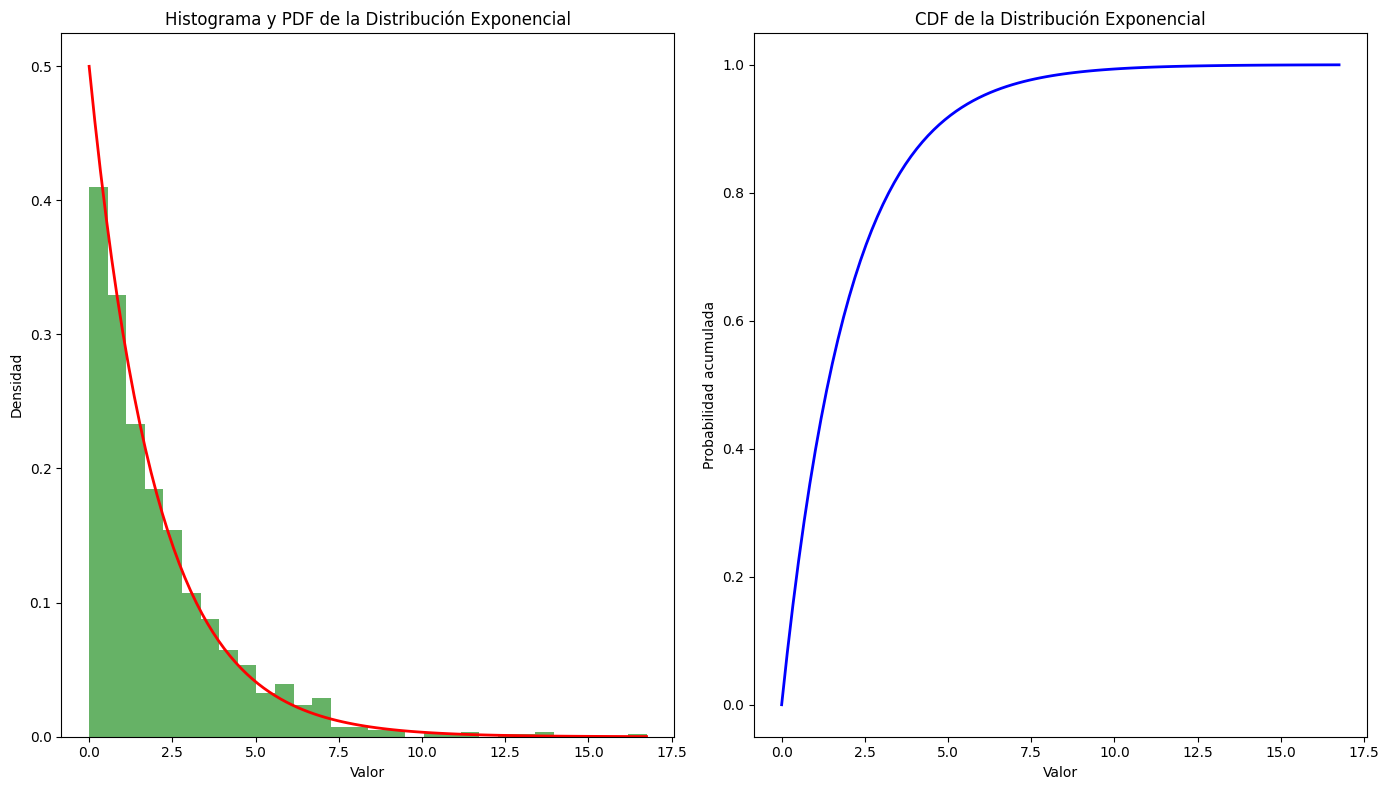

In [50]:
import numpy as np
import matplotlib.pyplot as plt
#  lambda
lambda_param = 0.5

# Generate a 1000 points sample from an exponential distribution
data = np.random.exponential(1/lambda_param, 1000)

# Generate PDF for Theoretical Probability
x = np.linspace(min(data), max(data), 100)
print('\n', x, '\n')
pdf = lambda_param * np.exp(-lambda_param *x)
print('\n', pdf, '\n')


# Generate CDF
cdf = 1 - np.exp(-lambda_param * x)
print('\n', cdf, '\n')

# Visualization
plt.figure(figsize=(14,8))
plt.subplot(1,2,1) # sets up a grid of plots inside a single fig nrwos, ncols, index
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')
plt.plot(x, pdf, 'r', linewidth=2)
plt.title('Histograma y PDF de la Distribución Exponencial')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.subplot(1,2,2)
plt.plot(x, cdf, 'b', linewidth=2)
plt.title('CDF de la Distribución Exponencial')
plt.xlabel('Valor')
plt.ylabel('Probabilidad acumulada')
plt.tight_layout() # adjusts spacing so that nothing overlaps and everything fits nice
plt.show()

## 3.8.2.3 Uniform Distribution

Each result in a given range has the same probability of occurring <br>

$PDF: f(x; a, b) = \frac{1}{b-a}$  for $a ≤ x ≤ b$ and 0 in any other case<br><br>

$CDF: F(x) = \frac{x-a}{b-a}$ for $a ≤ x ≤ b$, 0 if $x<a$ and 1 if $x>b$





 [2.21273119 6.06425919 9.71207848 6.30938255 9.62716907 2.4047244
 3.73803261 7.21774047 9.26230473 0.11751922 2.84806476 6.88107676
 7.5955131  5.30803721 9.19929899 0.97537026 4.85924897 3.23292439
 3.00060261 0.83822598 2.29324426 3.07890033 5.33398369 4.45709446
 3.67170502 0.12671808 6.14810443 6.0259596  3.56317738 6.87604802
 8.3753091  5.73014296 7.80631862 4.90766552 6.9911085  7.50574843
 6.85646361 1.62076174 3.16826406 1.11188667 8.23687271 5.04231916
 4.15797529 0.81194185 9.28767808 4.51472509 7.58107894 2.87218054
 9.20600396 1.32591239 3.15064692 4.11788631 2.20617323 5.66263815
 2.3038485  5.98157346 5.85543082 7.38893703 9.22336261 8.52747542
 3.30295285 4.8976817  6.11401095 4.99714401 0.61213759 1.87791469
 2.42755528 4.39543773 9.1477038  1.56497017 9.88000745 8.13368089
 0.41364979 1.64662084 8.44507092 3.63215054 3.29028843 5.95604834
 7.80531256 5.28934339 7.83337167 2.84133139 9.90262146 2.78936148
 2.27174376 6.28573025 9.74734987 0.24850722 5.0543186  1.141

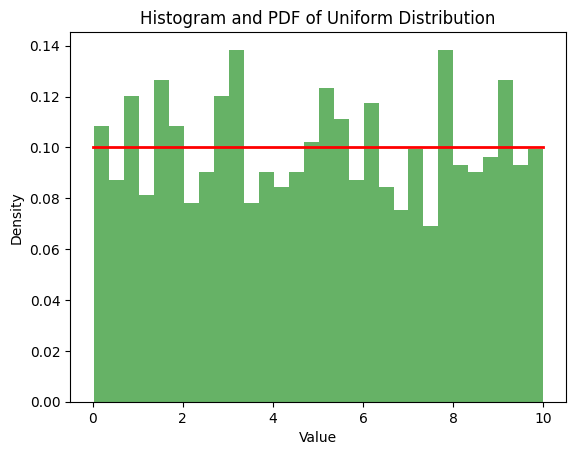

In [52]:
import numpy as np
import matplotlib.pyplot as plt

a, b = 0, 10

# Generate a 1000 points sample for a Uniform Distribution
data = np.random.uniform(a, b, 1000)
print('\n', data, '\n')

# Create vector with theoretical pdf
x = np.linspace(a, b, 100)
print('\n', x, '\n')
pdf = [1/(b-a) for _ in x]

# Create histogram
counts, bins, _ = plt.hist(data, bins=30, density=True, alpha=0.6, color='g')

# Graph theoretical pdf
plt.plot(x, pdf, 'r', linewidth=2)

# Decorate graph
plt.title('Histogram and PDF of Uniform Distribution')
plt.xlabel('Value')
plt.ylabel('Density')

plt.show()
